In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [114]:
import os
import numpy as np


In [116]:
npy_dir = r"C:\Users\USER\Chameleon AI-IoT\MOP-Code\artificial-intelligence\Traffic Analysis\LSTM-GRU Vehicle Traffic\traffic_dashboard\data"  # change this to your actual folder path


In [124]:
# Get all .npy files in the folder
npy_files = [f for f in os.listdir(npy_dir) if f.endswith(".npy")]

# Dictionary to store all arrays
arrays = {}

# Load each file
for file in npy_files:
    path = os.path.join(npy_dir, file)
    key = file.replace(".npy", "")  # Use filename (without .npy) as key
    arrays[key] = np.load(path)


In [126]:
print(arrays.keys())          # See what you loaded
print(arrays["y_true"].shape)  # Example access


dict_keys(['y_arima', 'y_bayesian', 'y_bayesian_12', 'y_bayesian_15', 'y_bayesian_7', 'y_hyperband', 'y_pred_optuna_tri', 'y_prophet', 'y_randomsearch', 'y_true'])
(12620,)


In [130]:
for key, arr in arrays.items():
    print(f"{key}: {len(arr)}")


y_arima: 6850
y_bayesian: 12620
y_bayesian_12: 12622
y_bayesian_15: 12621
y_bayesian_7: 12623
y_hyperband: 12620
y_pred_optuna_tri: 12620
y_prophet: 6850
y_randomsearch: 12620
y_true: 12620


In [136]:
import pandas as pd

# Fix the mismatched array by trimming
arrays["y_bayesian_15"] = arrays["y_bayesian_15"][:12620]  # trim to match y_true

# Reconstruct trimmed dictionary
arrays_filtered = {
    "Actual": arrays["y_true"],
    "Predicted_Bayesian_LSTM": arrays["y_bayesian"],
    "Predicted_Bayesian_LSTM(ts=15)": arrays["y_bayesian_15"],
    "Predicted_Hyperband_LSTM": arrays["y_hyperband"],
    "Predicted_Optuna_TriLSTM": arrays["y_pred_optuna_tri"],
    "Predicted_RandomSearch_LSTM": arrays["y_randomsearch"]
}

# Create DataFrame
df_filtered = pd.DataFrame({key: arr.flatten() for key, arr in arrays_filtered.items()})

# Save as CSV
df_filtered.to_csv(
    r"C:\Users\USER\Chameleon AI-IoT\MOP-Code\artificial-intelligence\Traffic Analysis\LSTM-GRU Vehicle Traffic\traffic_dashboard\streamlit_visualization/traffic_dashboard_predictions_filtered.csv",
    index=False
)

# Preview
print(df_filtered.head())


     Actual  Predicted_Bayesian_LSTM  Predicted_Bayesian_LSTM(ts=15)  \
0  0.012309                 0.047166                        0.047737   
1  0.074904                 0.047447                        0.046163   
2  0.011797                 0.049307                        0.045732   
3  0.007146                 0.047621                        0.046369   
4  0.007537                 0.048971                        0.047102   

   Predicted_Hyperband_LSTM  Predicted_Optuna_TriLSTM  \
0                  0.050001                   0.05069   
1                  0.049920                   0.05069   
2                  0.050065                   0.05069   
3                  0.050150                   0.05069   
4                  0.050401                   0.05069   

   Predicted_RandomSearch_LSTM  
0                     0.047560  
1                     0.046943  
2                     0.047407  
3                     0.047282  
4                     0.048461  


In [63]:
import pandas as pd

# Load the real-world data source
df_raw = pd.read_csv(r"C:\Users\USER\Chameleon AI-IoT\MOP-Code\artificial-intelligence\Traffic Analysis\Strategic Road Segment Analysis\dataset\traffic_volume_analysis_new.csv")

# Inspect columns relevant to suburb-location relation
subset = df_raw[["suburb", "location"]].dropna().drop_duplicates().reset_index(drop=True)

# Encode suburb and location for mapping
subset["suburb_encoded"] = subset["suburb"].astype("category").cat.codes
subset["location_encoded"] = subset["location"].astype("category").cat.codes

# Reorder columns for saving
suburb_location_mapping = subset[["suburb", "suburb_encoded", "location", "location_encoded"]].drop_duplicates()

# Save final mapping
suburb_location_mapping.to_csv(r"C:\Users\USER\Chameleon AI-IoT\MOP-Code\artificial-intelligence\Traffic Analysis\LSTM-GRU Vehicle Traffic\traffic_dashboard\streamlit_visualization/suburb_location_mapping.csv", index=False)



In [87]:
# Suburb filter only
if "suburb" in df.columns:
    all_suburbs = sorted(df["suburb"].dropna().unique())

In [89]:
all_suburbs

[]

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
data = [
    ("Prophet", 91.89, 77.92, -1.6379, None),
    ("ARIMA", 60.00, 42.96, -0.1247, None),
    ("Trimodel (SELU)", 21.4984, 16.8389, -59474.8984, 462.1816),
    ("Bidirectional LSTM", 0.1298, 0.0975, -1.1677, 0.0168),
    ("Two-Layer LSTM", 0.0990, 0.0511, -0.2619, 0.0098),
    ("Three-Layer LSTM + Dropout", 0.0942, 0.0656, -0.1431, 0.0089),
    ("Single-Layer LSTM", 0.0928, 0.0506, -0.1080, 0.0086),
    ("Two-Layer LSTM + Dropout", 0.0899, 0.0590, -0.0402, 0.0081),
    ("Tri-LSTM Optuna", 0.0883, 0.0532, -0.0035, None),
    ("Trimodel2 (tanh)", 0.0880, 0.0541, 0.0027, 0.0077),
    ("Hyperband Optimized Trimodel", 0.0865, 0.0524, 0.0369, 0.0075),
    ("Bayesian_12_ Optimized Trimodel (t=12)", 0.0860, 0.0526, 0.0486, 0.0074),
    ("Random Search Tuned Trimodel", 0.0836, 0.0485, 0.1007, 0.0070),
    ("Bayesian Optimized Trimodel", 0.0826, 0.0526, 0.1213, 0.0068),
    ("Bayesian_7_ Optimized Trimodel (t=7)", 0.0826, 0.0505, 0.1223, 0.0068),
    ("Bayesian_15_ Optimized Trimodel (t=15)", 0.0806, 0.0501, 0.1644, 0.0065),
]

df = pd.DataFrame(data, columns=["Model", "RMSE", "MAE", "R2", "MSE"])

df


,Model,RMSE,MAE,R2,MSE
0,Prophet,91.8900,77.9200,-1.6379,NaN
1,ARIMA,60.0000,42.9600,-0.1247,NaN
2,Trimodel (SELU),21.4984,16.8389,-59474.8984,462.1816
3,Bidirectional LSTM,0.1298,0.0975,-1.1677,0.0168
4,Two-Layer LSTM,0.0990,0.0511,-0.2619,0.0098
5,Three-Layer LSTM + Dropout,0.0942,0.0656,-0.1431,0.0089
6,Single-Layer LSTM,0.0928,0.0506,-0.1080,0.0086
7,Two-Layer LSTM + Dropout,0.0899,0.0590,-0.0402,0.0081
8,Tri-LSTM Optuna,0.0883,0.0532,-0.0035,NaN
9,Trimodel2 (tanh),0.0880,0.0541,0.0027,0.0077


C:\Users\USER\AppData\Local\Temp\ipykernel_22640\1049552730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df.sort_values("R2", ascending=False), y="Model", x="R2", palette="crest")


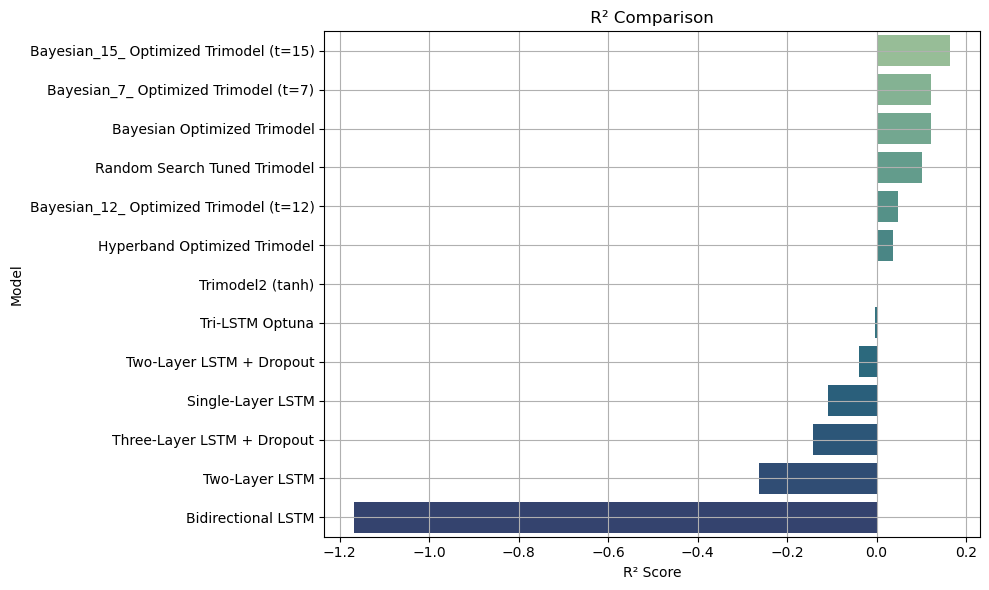

In [97]:
# Filter out Prophet, ARIMA, and the extreme outlier (Trimodel (SELU))
filtered_df = df[~df["Model"].isin(["Prophet", "ARIMA", "Trimodel (SELU)"])]

# Plot R² Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df.sort_values("R2", ascending=False), y="Model", x="R2", palette="crest")
plt.title(" R² Comparison ")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_22640\2238619883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df.sort_values("MAE"), y="Model", x="MAE", palette="mako")


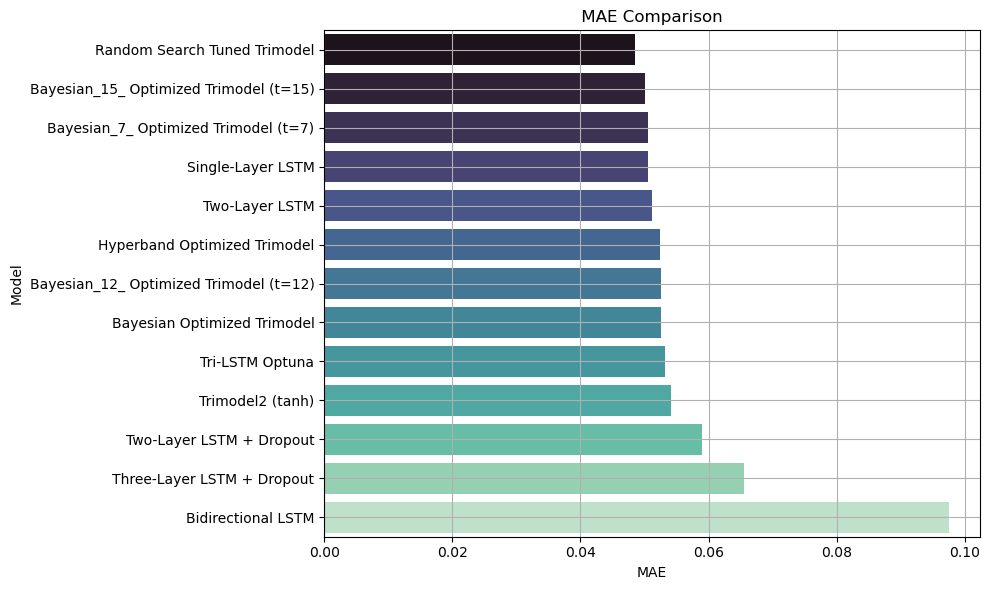

In [112]:

# Plot MAE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df.sort_values("MAE"), y="Model", x="MAE", palette="mako")
plt.title(" MAE Comparison ")
plt.xlabel("MAE")
plt.ylabel("Model")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_22640\1396958905.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df.sort_values("RMSE"), y="Model", x="RMSE", palette="flare")


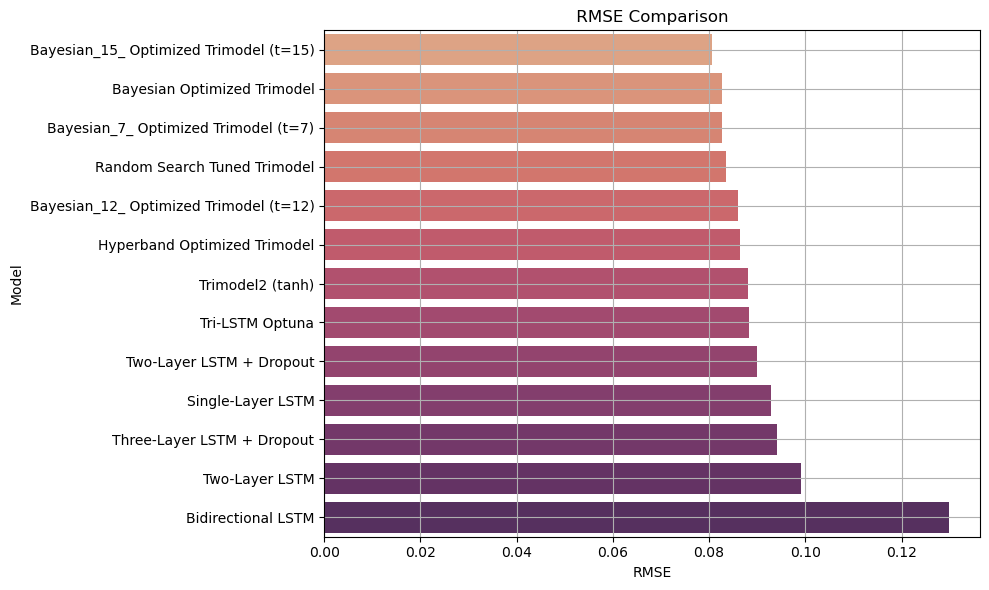

In [110]:

# Plot RMSE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df.sort_values("RMSE"), y="Model", x="RMSE", palette="flare")
plt.title(" RMSE Comparison ")
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_22640\3855436754.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compare_subset, x="Model", y="RMSE", palette="Set2")


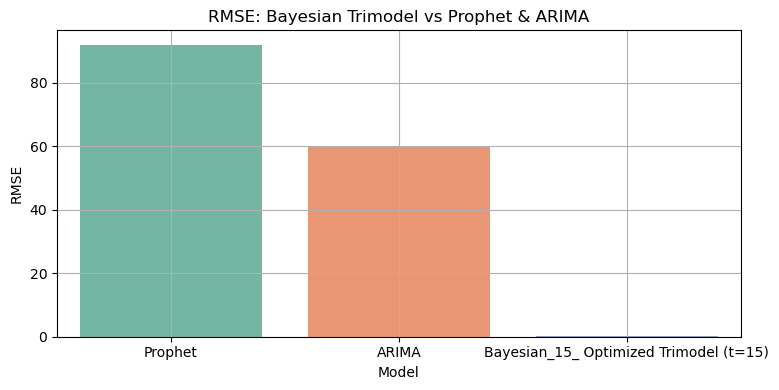

In [101]:

# Separate comparison plot for ARIMA, Prophet, and Bayesian_15_ Optimized Trimodel
compare_subset = df[df["Model"].isin([
    "Bayesian_15_ Optimized Trimodel (t=15)",
    "Prophet",
    "ARIMA"
])]

# Plot RMSE
plt.figure(figsize=(8, 4))
sns.barplot(data=compare_subset, x="Model", y="RMSE", palette="Set2")
plt.title("RMSE: Bayesian Trimodel vs Prophet & ARIMA")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_22640\1517914977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compare_subset, x="Model", y="MAE", palette="Set2")


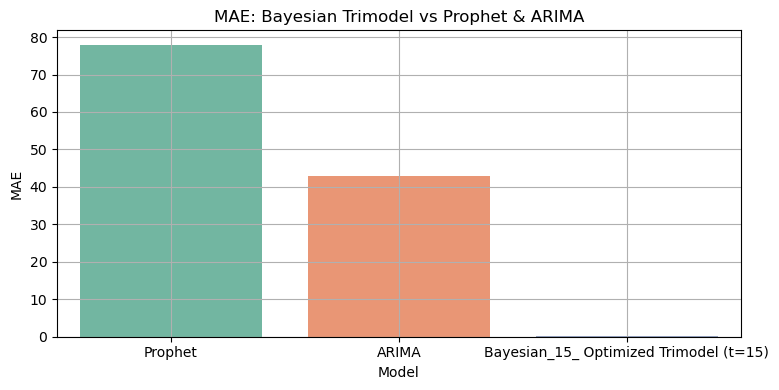

In [103]:


# Plot MAE
plt.figure(figsize=(8, 4))
sns.barplot(data=compare_subset, x="Model", y="MAE", palette="Set2")
plt.title("MAE: Bayesian Trimodel vs Prophet & ARIMA")
plt.ylabel("MAE")
plt.xlabel("Model")
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\USER\AppData\Local\Temp\ipykernel_22640\236028034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compare_subset, x="Model", y="R2", palette="Set2")


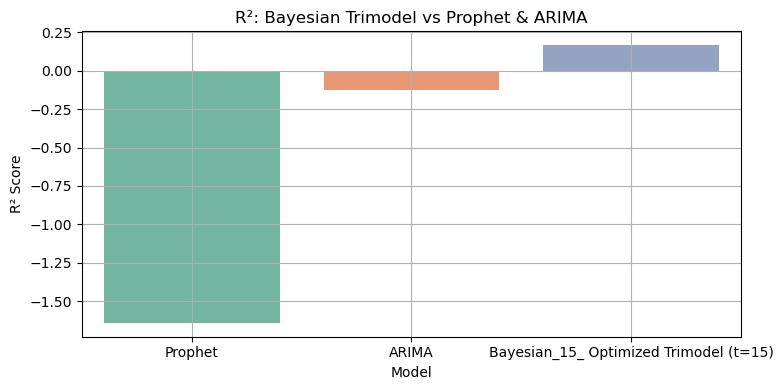

In [104]:
# Plot R²
plt.figure(figsize=(8, 4))
sns.barplot(data=compare_subset, x="Model", y="R2", palette="Set2")
plt.title("R²: Bayesian Trimodel vs Prophet & ARIMA")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.grid(True)
plt.tight_layout()
plt.show()
